# Sample Towards Goal

In [ ]:
from numpy import arctan2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math

In [ ]:
%matplotlib inline

In [ ]:
seed_value = 0
random.seed(seed_value)
np.random.seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)

In [ ]:
x = np.array([0., 0., math.pi / 8.0, 0.0, 0.0])
goal = np.array([-.05, -.05])

In [ ]:
def towards_goal(curr_x):
    dt = 0.2
    mean_angle = (math.atan2(goal[1] - x[1], goal[0] - x[0]) - x[2]) / dt
    var_angle = 1.9/4
    # var_angle = 0.5
    angular_velocity = np.random.normal(mean_angle, var_angle**2)
    linear_velocity = 0.3
    return np.array([linear_velocity, angular_velocity])

In [ ]:
def motion(x: np.ndarray, u: np.ndarray) -> np.ndarray:
    """
    Describes how the robot moves
    :param x: current robot state
    :param u: action performed by the robot
    :return: the new robot state
    """
    dt = 0.2
    new_x = np.array(x, copy=True)
    # angle
    new_x[2] += u[1] * dt
    # vel lineare
    new_x[3] = u[0]
    # vel angolare
    new_x[4] = u[1]
    # x
    new_x[0] += u[0] * math.cos(new_x[2]) * dt
    # y
    new_x[1] += u[0] * math.sin(new_x[2]) * dt

    return new_x

In [ ]:
# ax.plot(sub_traj[:, 0], sub_traj[:, 1], "--r")

In [ ]:
actions = np.array([towards_goal(x) for _ in range(1000)])
states = np.array([motion(x=x, u=a) for a in actions])

In [ ]:
fig = plt.figure()
plt.cla()

plt.grid(True)
# plt.axis("equal")
vel_ang = (math.atan2(goal[1] - x[1], goal[0] - x[0]) - x[2]) / 0.2
mean = np.array([0.3, vel_ang])
x1 = motion(x=x, u=mean)

# for s in states:
#     fig.gca().plot([x[0], s[0]], [x[1], s[1]], "--g")

plt.gca().scatter(states[:, 0], states[:, 1])
# fig.gca().plot([x[0], x1[0]], [x[1], x1[1]], "--r")
# ROBOT POSITION
plt.plot(x[0], x[1], "xr")
# GOAL POSITION
plt.plot(goal[0], goal[1], "xb")
# plt.plot(10, 10, "xb")

fig.savefig("Sample_Towards.png", dpi=300)

# Action Evolution

In [ ]:
import seaborn as sns
import pandas as pd
sns.set_theme()

In [ ]:
actions = np.load("actions.npy")

In [ ]:
df = pd.DataFrame(
    {
        "Linear Velocity": actions[:, 0],
        "Angular Velocity": actions[:, 1]
    }
)
df = df.iloc[:500]

In [ ]:
len(df)

In [ ]:
fig, axs = plt.subplots(2, sharex=True)
sns.lineplot(data=df,x=df.index, y="Linear Velocity", ax=axs[0], color= '#4c72b0')
sns.lineplot(data=df,x=df.index, y="Angular Velocity", ax=axs[1], color= '#c44e52')

# Tree Trajectories

## Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

trajectories = np.load("trajectories.npz", allow_pickle=True)
values = np.load("rollout_values.npz", allow_pickle=True)
fig = plt.figure()
sim = trajectories['arr_0']
x = sim[0][0]

bottom_limit = -0.5
upper_limit = 11.5

right_limit = 11.5
left_limit = -0.5

ob = np.array([
        [4.5, 5.0],
        [5.0, 4.5],
        [5.0, 5.0],
        [5.0, 5.5],
        [5.5, 5.0],
    ])


for step_name in trajectories.files:
    step = trajectories[step_name]
    val_points = values[step_name]
    last_points = np.array([trj[-1][:2] for trj in step])
    x0 = step[0][0]
    
    fig = plt.figure()
    plt.cla()
    fig.gca().set_xlim([left_limit, right_limit])
    fig.gca().set_ylim([bottom_limit, upper_limit])
    plt.grid(True)
    # ROBOT POSITION
    plt.plot(x0[0], x0[1], "or")
    # OBSTACLES
    plt.plot(ob[:, 0], ob[:, 1], "ok")
    # GOAL 
    plt.plot(10, 10, "om")
    
    plt.scatter(last_points[:, 0], last_points[:, 1], c=val_points, marker='x')
    plt.colorbar()
    fig.savefig(f'trajectories_{step_name}.png', dpi=300)
    plt.close(fig)

## Animation

In [ ]:
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

bottom_limit = -0.5
upper_limit = 11.5

right_limit = 11.5
left_limit = -0.5

ob = np.array([
        [4.5, 5.0],
        [5.0, 4.5],
        [5.0, 5.0],
        [5.0, 5.5],
        [5.5, 5.0],
    ])


def plot_frame(i, trajectories, values, fig):
    fig.clear()
    ax = fig.add_subplot()
    ax.set_title(f"Step: {i}")
    # plt.title(f"Step: {i}")
    file_name = trajectories.files[i]
    step = trajectories[file_name]
    val_points = values[file_name]
    
    last_points = np.array([trj[-1][:2] for trj in step])
    x0 = step[0][0]
    
    ax.cla()
    ax.set_xlim([left_limit, right_limit])
    ax.set_ylim([bottom_limit, upper_limit])
    ax.grid(True)
    # ROBOT POSITION
    ax.plot(x0[0], x0[1], "or")
    # OBSTACLES
    ax.plot(ob[:, 0], ob[:, 1], "ok")
    # GOAL 
    ax.plot(10, 10, "om")
    cmap = ax.scatter(last_points[:, 0], last_points[:, 1], c=val_points, marker='x')
    plt.colorbar(cmap)
    
trajectories = np.load("trajectories_0.npz", allow_pickle=True)
print(len(trajectories))
values = np.load("rollout_values_0.npz", allow_pickle=True)
print(len(values))
fig = plt.figure()

ani = FuncAnimation(
    fig,
    plot_frame,
    fargs=(trajectories, values, fig),
    frames=len(trajectories)
)
ani.save(f"animation.mp4", fps=5, dpi=300)
print("Done")

# Heatmap

In [32]:
from dataclasses import dataclass
from scipy.spatial.distance import cdist, euclidean
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import math
import seaborn as sns
from bettergym.environments.robot_arena import RobotArenaState,RobotArena, dist_to_goal
from environment_creator import create_env_four_obs_difficult_continuous, create_env_five_small_obs_continuous

In [33]:
def get_rwrd(env, x_pos):
    env = env.gym_env
    state = env.state
    state.x[:2] = x_pos
    env.dist_goal = dist_to_goal(state.x[:2], env.state.goal)
    
    collision = env.check_collision(state)
    goal = env.dist_goal <= env.config.robot_radius
    out_boundaries = env.check_out_boundaries(state)
    return env.reward_grad(state=None, action=None, is_collision=collision, is_goal=goal, out_boundaries=out_boundaries)

In [34]:
real_env = create_env_five_small_obs_continuous(initial_pos=(1, 1), goal=(10, 10))

In [35]:
x = np.linspace(-0.5, 11.5, 1000)
y = np.linspace(-0.5, 11.5, 1000)

In [36]:
X, Y = np.meshgrid(x, y)

In [37]:
pos_matrix = np.stack([X, Y], axis=2)

In [38]:
zeros = np.zeros((len(x), len(y)))

In [39]:
for row_num in range(pos_matrix.shape[0]):
    for col_num in range(pos_matrix.shape[1]):
        zeros[row_num, col_num] = get_rwrd(real_env, pos_matrix[row_num, col_num])

In [40]:
# np.apply_along_axis(get_rwrd, axis=2, arr=pos_matrix)

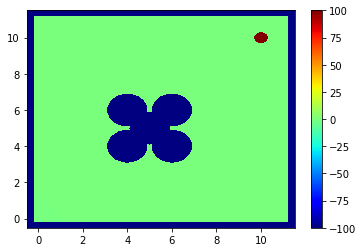

In [41]:
fig, ax = plt.subplots()
cmap = ax.pcolormesh(X, Y, zeros, cmap="jet")
fig.colorbar(cmap)

In [42]:
fig.savefig('heatmap.png', dpi=300)

# Q Values Plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette())
%matplotlib inline

q = np.load("q_values_0.npz", allow_pickle=True)

for step_name in q.files:
    data = q[step_name]
    x = list(range(len(data)))
    plt.clf()
    sns.barplot(x=x, y=data, palette="Set2")
    plt.savefig(f'debug/q/q_{step_name}.png', dpi=300)

# Actions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette())
%matplotlib inline

a = np.load("actions_0.npz", allow_pickle=True)
a_chosen = np.load("chosen_a_0.npz", allow_pickle=True)['arr_0']
idx = 0
for step_name in q.files:
    data = a[step_name]
    plt.clf()
    sns.scatterplot(x=data[:, 0], y=data[:, 1])
    plt.plot(a_chosen[idx, 0], a_chosen[idx, 1], "ok")
    plt.xlabel("Linear Velocity")
    plt.ylabel("Angular Velocity")
    plt.savefig(f'debug/a/a_{step_name}.png', dpi=300)
    idx+=1

#  Stuff

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(sns.color_palette())
%matplotlib inline

trj = np.load("trajectory_real_0.npz", allow_pickle=True)['arr_0']
x_vals = trj[:, 0]
y_vals = trj[:, 1]
angles = trj[:, 2]
lin_vel = trj[:, 3]

# X
plt.clf()
sns.lineplot(x=range(len(x_vals)), y=x_vals)
plt.xlabel("Step")
plt.ylabel("X")
plt.savefig('debug/X.svg', dpi=300)

# Y
plt.clf()
sns.lineplot(x=range(len(y_vals)), y=y_vals)
plt.xlabel("Step")
plt.ylabel("Y")
plt.savefig('debug/Y.svg', dpi=300)

# Lin Vel
plt.clf()
sns.lineplot(x=range(len(lin_vel)), y=lin_vel)
plt.xlabel("Step")
plt.ylabel("Linear Velocity")
plt.savefig('debug/Lin Vel.svg', dpi=300)

# Angles
plt.clf()
sns.lineplot(x=range(len(angles)), y=angles)
plt.xlabel("Step")
plt.ylabel("Angles")
plt.savefig('debug/Angles.svg', dpi=300)